In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import metrics, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [ ]:
dfr = pd.read_csv('/content/winequality-red.csv', sep=';')
dfr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
dfw = pd.read_csv('/content/winequality-white.csv', sep=';')
dfw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
print(dfr.shape)
print(dfw.shape)

# type(df)
print(dfr.head())

(1599, 12)
(4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

In [ ]:
# Add 'color' column to each dataset before merging
dfr["color"] = 1 #red
dfw["color"] = 0 #white

# Concatenate both red and white wine datasets
df = pd.concat([dfr, dfw])
df

# # Separate features and target variable
X = df.drop(columns=['quality', 'color']) # Features (excluding 'quality' and 'color')
y = df['quality']  # Target variable

# Lasso regression on both white and red wines

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# LASSO regression
lasso = linear_model.Lasso(alpha=0.15,fit_intercept=True)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

coefficients = lasso.coef_

print("Mean squared error of Lasso regression: {:.2f}".format(mean_squared_error(y_test, y_pred)) )

print("Lasso coefficients:")
print(coefficients)

selected_features = X.columns[lasso.coef_ != 0]
print("\n Selected Features:")
print(selected_features)

Mean squared error of Lasso regression: 0.46
Lasso coefficients:
[ 0.         -0.10976812  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.22375587  0.        ]

 Selected Features:
Index(['volatile acidity', 'alcohol'], dtype='object')


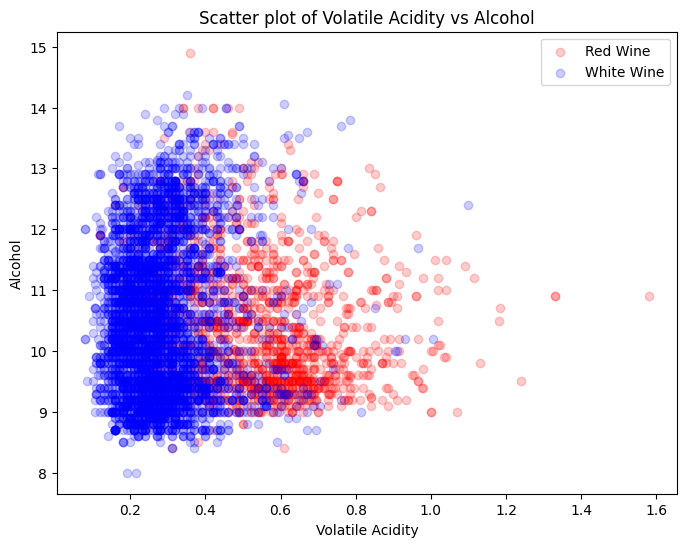

In [ ]:
selected_features = ['volatile acidity', 'alcohol']
selected_data = df[selected_features + ['quality']]

red_wine = selected_data[df['color'] == 1]
white_wine = selected_data[df['color'] == 0]

# Plotting the selected features for red wine
plt.figure(figsize=(8, 6))
plt.scatter(red_wine['volatile acidity'], red_wine['alcohol'], c='red', label='Red Wine', alpha = 0.2)
plt.scatter(white_wine['volatile acidity'], white_wine['alcohol'], c='blue', label='White Wine', alpha = 0.2)
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.title('Scatter plot of Volatile Acidity vs Alcohol')
plt.legend()
plt.show()

#Lasso regression on only white wines

In [ ]:
# # Separate features and target variable
X_w = dfw.drop(columns=['quality', 'color']) # Features (excluding 'quality' and 'color')
y_w = dfw['quality']  # Target variable

scaler = StandardScaler()
X_w_scaled = scaler.fit_transform(X_w)

X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w_scaled, y_w, test_size=0.25, random_state=42)

# LASSO regression
lasso = linear_model.Lasso(alpha=0.1,fit_intercept=True)    #!!!might still need adjusting

lasso.fit(X_w_train, y_w_train)

y_w_pred = lasso.predict(X_w_test)

coefficients = lasso.coef_

print("Mean squared error of Lasso regression: {:.2f}".format(mean_squared_error(y_w_test, y_w_pred)) )

print("Lasso coefficients:")
print(coefficients)

selected_features = X_w.columns[lasso.coef_ != 0]
print("\n Selected Features:")
print(selected_features)

Mean squared error of Lasso regression: 0.61
Lasso coefficients:
[-0.         -0.09418587 -0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.28852542]

 Selected Features:
Index(['volatile acidity', 'alcohol'], dtype='object')


#Lasso regression on only red wines

In [ ]:
# # Separate features and target variable
X_r = dfr.drop(columns=['quality', 'color']) # Features (excluding 'quality' and 'color')
y_r = dfr['quality']  # Target variable

scaler = StandardScaler()
X_r_scaled = scaler.fit_transform(X_r)

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r_scaled, y_r, test_size=0.25, random_state=42)

# LASSO regression
lasso = linear_model.Lasso(alpha=0.2,fit_intercept=True)    #!!!might still need adjusting

lasso.fit(X_r_train, y_r_train)

y_r_pred = lasso.predict(X_r_test)

coefficients = lasso.coef_

print("Mean squared error of Lasso regression: {:.2f}".format(mean_squared_error(y_r_test, y_r_pred)) )

print("Lasso coefficients:")
print(coefficients)

selected_features = X_r.columns[lasso.coef_ != 0]
print("\n Selected Features:")
print(selected_features)

Mean squared error of Lasso regression: 0.49
Lasso coefficients:
[ 0.         -0.06901846  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.18168716]

 Selected Features:
Index(['volatile acidity', 'alcohol'], dtype='object')


# Training Random Forest Model on the features Volatile Acidity, alcohol and color


In [ ]:
selected_features = ['volatile acidity', 'alcohol', 'color']
selected_data = df[selected_features + ['quality']]

X_selected = selected_data[selected_features]
y_selected = selected_data['quality']

# Split the data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42)

# Initialize and fit a Random Forest Regression model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_sel, y_train_sel)

# Predict on the test set
y_pred_rf_two_features = random_forest.predict(X_test_sel)

# Calculate Mean Squared Error on the test set
mse_rf = mean_squared_error(y_test_sel, y_pred_rf_two_features)
print("Mean squared error using Random Forest:", mse_rf)

Mean squared error using Random Forest: 0.6040099591887393


# Training Random Forest Model on the features Volatile Acidity, alcohol on white


In [ ]:
features_white = ['volatile acidity', 'alcohol']
data_white = dfw[features_white + ['quality']]

X_selected = data_white[features_white]
y_selected = data_white['quality']

# Split the data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42)

# Initialize and fit a Random Forest Regression model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_sel, y_train_sel)

# Predict on the test set
y_pred_rf_two_feat_white = random_forest.predict(X_test_sel)

# Calculate Mean Squared Error on the test set
mse_rf_white = mean_squared_error(y_test_sel, y_pred_rf_two_feat_white)
print("Mean squared error using Random Forest:", mse_rf_white)

Mean squared error using Random Forest: 0.6109983794642568


# Training Random Forest Model on the features Volatile Acidity, alcohol on red wine


In [ ]:
features_red = ['volatile acidity', 'alcohol']
data_red = dfr[features_red + ['quality']]

X_selected = data_red[features_red]
y_selected = data_red['quality']

# Split the data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42)

# Initialize and fit a Random Forest Regression model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_sel, y_train_sel)

# Predict on the test set
y_pred_rf_two_feat_red = random_forest.predict(X_test_sel)

# Calculate Mean Squared Error on the test set
mse_rf_red = mean_squared_error(y_test_sel, y_pred_rf_two_feat_red)
print("Mean squared error using Random Forest:", mse_rf_red)

Mean squared error using Random Forest: 0.46181465281946343


# Training Random Forest on all the features present in the Wine Quality Dataset using Random Forest

In [ ]:
X = df.drop(columns=['quality'])
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

random_forest_all_features = RandomForestRegressor(random_state=42)
random_forest_all_features.fit(X_train, y_train)

y_pred_rf_all = random_forest_all_features.predict(X_test)

mse_rf_all = mean_squared_error(y_test, y_pred_rf_all)
print("Mean squared error using Random Forest with all features:", mse_rf_all)


Mean squared error using Random Forest with all features: 0.3820424615384615


# Training Random Forest on all the features present in the White Wine Dataset using Random Forest

In [ ]:
X = dfw.drop(columns=['quality'])
y = dfw['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

random_forest_all_features = RandomForestRegressor(random_state=42)
random_forest_all_features.fit(X_train, y_train)

y_pred_rf_all_features_white = random_forest_all_features.predict(X_test)

mse_rf_all_features_white = mean_squared_error(y_test, y_pred_rf_all_features_white)
print("Mean squared error using Random Forest with all features:", mse_rf_all_features_white)

Mean squared error using Random Forest with all features: 0.36027738775510204


# Training Random Forest on all the features present in the Red Wine Dataset using Random Forest

In [ ]:
X = dfr.drop(columns=['quality'])
y = dfr['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

random_forest_all_features = RandomForestRegressor(random_state=42)
random_forest_all_features.fit(X_train, y_train)

y_pred_rf_all_features_red = random_forest_all_features.predict(X_test)

mse_rf_all_features_red = mean_squared_error(y_test, y_pred_rf_all_features_red)
print("Mean squared error using Random Forest with all features:", mse_rf_all_features_red)

Mean squared error using Random Forest with all features: 0.30912275


# Training SVM on the features Volatile Acidity, alcohol, and color

In [ ]:
from sklearn.svm import SVR

selected_features = ['volatile acidity', 'alcohol', 'color']
selected_data = df[selected_features + ['quality']]

X_selected = selected_data[selected_features]
y_selected = selected_data['quality']

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_scaled, y_train_sel)

y_pred_svm_two_features = svm_reg.predict(X_test_scaled)

mse_svm = mean_squared_error(y_test_sel, y_pred_svm_two_features)
print("Mean squared error using SVM:", mse_svm)


Mean squared error using SVM: 0.558442238775967


# Training SVM on all the features present in the Wine Quality Dataset using Random Forest

In [ ]:
from sklearn.svm import SVR

X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_reg_all = SVR(kernel='linear')
svm_reg_all.fit(X_train_scaled, y_train)

y_pred_svm_all = svm_reg_all.predict(X_test_scaled)

mse_svm_all = mean_squared_error(y_test, y_pred_svm_all)
print("Mean squared error using SVM with all features:", mse_svm_all)


Mean squared error using SVM with all features: 0.5510207911857627


#Statistical Analysis

##White

In [271]:
# Assuming that the variables in the data are dependent  (since they come from the same dataset)


# We know that the data is not normally distributed "The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)"

from scipy.stats import ttest_rel

# Perform a paired t-test for Random Forest models
rf_p_value_white = ttest_rel(mse_rf_all_features_white, mse_rf_white, alternative='less').pvalue

# Compare p-values to determine if there is a statistically significant difference in performance
if rf_p_value_white < 0.01:
    print("We can reject the alternative hypothesis that using only the two features is better than using all features with a 99\% confidence interval within the white wine quality dataset")
else:
    print("We can accept the alternative hypothesis that using only the two features is better than using all features with a 99\% confidence interval within the white wine quality dataset")

We can accept the alternative hypothesis that using only the two features is better than using all features with a 99\% confidence interval within the white wine quality dataset


## Red

In [272]:
# Assuming that the variables in the data are dependent  (since they come from the same dataset)


# We know that the data is not normally distributed "The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)"

from scipy.stats import ttest_rel

# Perform a paired t-test for Random Forest models
rf_p_value_red = ttest_rel(mse_rf_all_features_red, mse_rf_red, alternative='less').pvalue

# Compare p-values to determine if there is a statistically significant difference in performance
if rf_p_value_white < 0.01:
    print("We can reject the alternative hypothesis that using only the two features is better than using all features with a 99\% confidence interval within the red wine quality dataset ")
else:
    print("We can accept the alternative hypothesis that using only the two features is better than using all features with a 99\% confidence interval within the red wine quality dataset")

We can accept the alternative hypothesis that using only the two features is better than using all features with a 99\% confidence interval within the red wine quality dataset


### White and Red

In [ ]:
# Assuming that the variables in the data are dependent  (since they come from the same dataset)


# We know that the data is not normally distributed "The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)"

from scipy.stats import ttest_rel

# Perform a paired t-test for SVM models
svm_p_value = ttest_rel(mse_svm_all, mse_svm, nan_policy='propagate', alternative='two-sided').pvalue

# Perform a paired t-test for Random Forest models
rf_p_value = ttest_rel(mse_rf_all, mse_rf, nan_policy='propagate', alternative='two-sided').pvalue

# Compare p-values to determine if there is a statistically significant difference in performance
if rf_p_value < 0.05:
    print("Random Forest models show a significant difference in performance between two features and all features.")
else:
    print("No significant difference observed for Random Forest models.")

if svm_p_value < 0.05:
    print("SVM models show a significant difference in performance between two features and all features.")
else:
    print("No significant difference observed for SVM models.")

No significant difference observed for Random Forest models.
No significant difference observed for SVM models.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:
# WRONG ASSUMPTION


# from scipy.stats import ttest_ind

# # Perform independent-sample t-tests for Random Forest
# t_stat_rf, p_val_rf = ttest_ind([mse_rf], [mse_rf_all], equal_var=False)
# if p_val_rf < 0.1:
#     print("Random Forest shows a significant difference between selected and all features.")
# else:
#     print("No significant difference observed for Random Forest.")

# # Perform SVM Regression on all features
# svm_reg_all.fit(X_train_scaled, y_train)
# y_pred_svm_all = svm_reg_all.predict(X_test_scaled)
# mse_svm_all = mean_squared_error(y_test, y_pred_svm_all)
# print("Mean squared error using SVM with all features:", mse_svm_all)

# # Perform independent-sample t-tests for SVM
# t_stat_svm, p_val_svm = ttest_ind([mse_svm_all], [mse_rf], equal_var=False)
# if p_val_svm < 0.1:
#     print("SVM shows a significant difference between selected and all features.")
# else:
#     print("No significant difference observed for SVM.")

No significant difference observed for Random Forest.
Mean squared error using SVM with all features: 0.5510207911857627
No significant difference observed for SVM.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:
#Linear Regression - red

#features = ["alcohol", "residual sugar", "citric acid"]
features = ["alcohol", "volatile acidity"]
X = redwine_data[features]
y = redwine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs. Predicted', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality (redwine)')
plt.legend()
plt.show()

print(f'Mean Squared Error (redwine): {round(mse, 2)}')
print(f'R Squared Error (redwine): {round(r2, 2)}')
print(f'Mean Absolute Error (redwine): {round(mae, 2)}')





In [ ]:
#Linear Regression - white

X_w = whitewine_data[features]
y_w = whitewine_data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs. Predicted', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality (whitewine)')
plt.legend()
plt.show()

print(f'Mean Squared Error (whitewine): {round(mse, 2)}')
print(f'R Squared Error (whitewine): {round(r2, 2)}')
print(f'Mean Absolute Error (whitewine): {round(mae, 2)}')

Decision Tree

In [ ]:
#red
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions_red = model.predict(X_test)


mse = mean_squared_error(y_test, predictions_red)
r2 = r2_score(y_test, predictions_red)
mae = mean_absolute_error(y_test, predictions_red)



print(f'Mean squared error (redwine): {round(mse, 2)}')
print(f'R squared error (redwine): {round(r2, 2)}')
print(f'Mean absolute error (redwine): {round(mae, 2)}')

In [ ]:
#white

X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions_white = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_white)
r2 = r2_score(y_test, predictions_white)
mae = mean_absolute_error(y_test, predictions_white)

print(f'Mean squared error (whitewine): {round(mse, 2)}')
print(f'R Squared Error (whitewine): {round(r2, 2)}')
print(f'Mean Absolute Error (whitewine): {round(mae, 2)}')

Visualization of Decision Tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

Support Vector Machine

In [ ]:
#redwine

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVR()
model.fit(X_train, y_train)
predictions_svm_r = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions_svm_r)
mse = mean_squared_error(y_test, predictions_svm_r)
r2 = r2_score(y_test, predictions_svm_r)

print(f'Mean squared error (redwine): {round(mse, 2)}')
print(f'R squared error (redwine): {round(r2, 2)}')
print(f'Mean absolute error (redwine): {round(mae, 2)}')

In [ ]:
#whitewine

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_w)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_w, test_size=0.2, random_state=42)
model = SVR()
model.fit(X_train, y_train)
predictions_svm_w = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions_svm_w)
mse = mean_squared_error(y_test, predictions_svm_w)
r2 = r2_score(y_test, predictions_svm_w)

print(f'Mean squared error (whitewine): {round(mse, 2)}')
print(f'R squared error (whitewine): {round(r2, 2)}')
print(f'Mean absolute error (whitewine): {round(mae, 2)}')

SVM Decision Boundary on RedWine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your dataframe containing the wine dataset
# Replace 'quality' with the actual column name containing the target variable
X = redwine_data.drop('quality', axis=1).values  # Convert to NumPy array
y = redwine_data['quality'].values  # Convert to NumPy array

# Select the first two features for simplicity
X_2d = X[:, [1, 10]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Add labels and title
plt.xlabel("Volatile Acidity")
plt.ylabel("Alchohol")
plt.title('SVM Decision Boundary on Redwine Dataset (Volatile Acidity and Alchohol)')

# Show the plot
plt.show()

SVM Decision Tree on White wine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your dataframe containing the wine dataset
# Replace 'quality' with the actual column name containing the target variable
X = whitewine_data.drop('quality', axis=1).values  # Convert to NumPy array
y = whitewine_data['quality'].values  # Convert to NumPy array

X_2d = X[:, [1, 10]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Add labels and title
plt.xlabel("Volatile Acidity")
plt.ylabel("Alchohol")
plt.title('SVM Decision Boundary on Whitewine Dataset (Volatile Acidity and Alchohol)')

# Show the plot
plt.show()